# Deep_Learning Assignment_1 

#### Name: Saikrishna Javvadi ###
#### Student ID: 20236648 ###
#### Class: MSc. in Data Analytcis ###

### PART-1 & PART-2 
### Implement Logistic Regression( with neural network mindset) & Test on easy tasks(datasets)

Our brain is made up of 100 billion neurons that are all connected, and if any of these neurons receives enough input, it will fire the next neuron. The same can be modelled, and a neural network with nodes that are similar to neurons can be developed. Forward propagation is achieved by assigning weights and bias to each neuron and layer so that signals can progress through the layers. Then, at the final layer, we measure the loss in terms of the predicted label and propagate the error backward to various nodes to penalise the weights and other parameters.Then, until convergence, we'll keep iterating this method to adjust the weights of different layers.

####  Packages Used 

-  [pandas](https://pandas.pydata.org/) is a data manipulation and analysis software library for the Python programming language.
- [numpy](www.numpy.org) is a Python library that adds support for huge, multi-dimensional arrays and matrices, as well as a large number of high-level mathematical functions to work on these arrays.
- [matplotlib](http://matplotlib.org) is a famous library to plotting graphs in Python.
- [sklearn.model_selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) helps to split arrays or matrices into random train and test subsets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Loading the data and Pre_processing( including feature scaling )

In [2]:
def preprocessing(dataset):
    df = pd.read_csv('C:\\Users\\javva\\Downloads\\'+dataset) 
    X_data,Y_data = df.iloc[:,:-1].values, df.iloc[:,-1].values
    mean = np.mean(X_data, axis=0) 
    sd = np.std(X_data, axis=0) 
    X_data_scaled= (X_data -  mean) / sd
    X_train, X_test, Y_train, Y_test = train_test_split(X_data_scaled, Y_data, 
                                                        train_size = 2/3,
                                                        random_state=44)
    X_train, X_test = X_train.reshape(X_train.shape[0],-1).T,X_test.reshape(X_test.shape[0],-1).T
    Y_train, Y_test = Y_train.reshape(Y_train.shape[0],-1).T,Y_test.reshape(Y_test.shape[0],-1).T
    
    return X_data,Y_data,X_train, X_test, Y_train, Y_test

In [3]:
X_data_blobs,Y_data_blobs,X_train_blobs, X_test_blobs, Y_train_blobs, Y_test_blobs=preprocessing("blobs250.csv")

print(X_train_blobs.shape,Y_train_blobs.shape,X_test_blobs.shape,Y_test_blobs.shape)

X_data_moons,Y_data_moons,X_train_moons, X_test_moons,Y_train_moons, Y_test_moons=preprocessing("moons400.csv")

print(X_train_moons.shape,Y_train_moons.shape,X_test_moons.shape,Y_test_moons.shape)

(3, 166) (1, 166) (3, 84) (1, 84)
(2, 266) (1, 266) (2, 134) (1, 134)


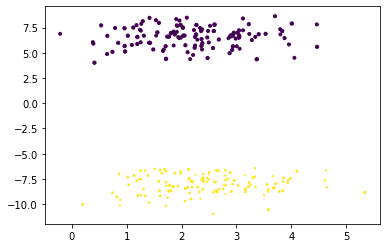

In [4]:
plt.scatter(X_data_blobs[:,0], X_data_blobs[:,1],X_data_blobs[:,2], c=Y_data_blobs)  

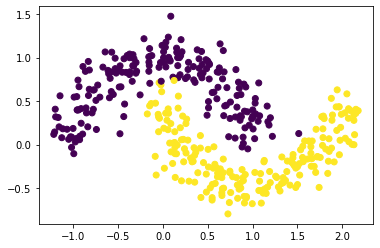

In [5]:
plt.scatter(X_data_moons[:,0], X_data_moons[:,1], c=Y_data_moons)

### Logistic Regression learning algorithm 

A Logistic regression unit can be considered as the most basic building block of a Neural network. We can stack up multiple neurons in the same layer and across multiple layers to convert it into a Deep Neural network.


###  Forward and Backward propagation:


#### Forward Propagation:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

We need to apply an activation function to convert straight line equation(z) above  into 0/1 values for classifier.
Training a neural network entails finding values for w and b such that, for all training cases ${x^{(i)}, y^{(i)}}$ the network outputs values $\hat{y}^{(i)}$ that are as close as possible to $y^{(i)}$



$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

#### Backward Propagation:

We will then use Gradient Descent optimisation algorithm to search for weights w and b that minimise the cost for a given training set. The below equations(which are obtained by performing partial derivatives on the previous forward propagation equations) can be used to update w and b after every epoch.

$$ dw=\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ db=\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

#### Optimization

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.
So, for our algorithm here the parameters to update would be:

$$ w = \theta - \alpha \text{ } dw$$
$$ b = \theta - \alpha \text{ } db$$

For my implementation,I would be following the below steps: \
    - Initialize  parameters of the model \
    - Learning parameters for the model by minimizing the cost \
    - Use the learned parameters to make predictions on the test set 

## Implementation of the algorithm

####  Sigmoid Function

 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [6]:
def sigmoid(z):
    #Function to calculate the sigmoid of z
    
    s = 1/(1+np.exp(-z))
    
    return s

####  Initializing parameters

In [7]:
def initialize_with_zeros(dimension):
    #Function to create a zeros vector 
    #of shape (dimension, 1) for w and initializes b to 0.
    
    w = np.zeros([dimension,1])
    b = 0
    
    parameters = {"w": w,
                  "b": b}
    
    return parameters

#### Forward and Backward Propagation

In [8]:
def forward_propagation(X,parameters):
    
    w = parameters['w']
    b = parameters['b']
    m = X.shape[1]
    
    #Forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)   # compute activation
    
    
    return A

In [9]:
def compute_cost(A, Y):
    
    m = Y.shape[1] # number of examples
    
    # compute cost
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    cost = np.squeeze(cost) 
   
    return cost

In [10]:
def backward_propagation(Y,A,X):
    
    m = X.shape[1]
    
    #Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)
    gradients = {"dw": dw,"db": db}
    
    return gradients

####  Optimization

In [11]:
def optimize(parameters, gradients, learning_rate):
    #Function to  optimize w and b by running a gradient descent algorithm
    
    # Retrieve derivatives from gradients
    dw = gradients["dw"]
    db = gradients["db"]
    
    w = parameters['w']
    b = parameters['b']
        
    # update rule
    w = w - learning_rate * dw
    b = b - learning_rate * db
        
    
    parameters = {"w": w,"b": b}

    return parameters

####  Predictions

In [12]:
def predict(parameters, X):
    #Function to predict if the label is 0 or 1 
    #using learned logistic regression parameters (w, b)
    
    m = X.shape[1]
    predictions = np.zeros((1,m))
    
    # Compute vector "A" predicting the probabilities 
    #of an example belonging to either class
    A = forward_propagation(X, parameters)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        predictions[0, i] = 1 if A[0, i] > 0.5 else 0
      
    return predictions

####  Merge all functions into a model ##

Now we build the overall model putting together all the building blocks implemented previously.


In [13]:
def model(X_train, Y_train, X_test, Y_test, 
          num_iterations = 2000, learning_rate = 0.5):
    
    #Function to build a logistic regression model 
    #by calling the functions implemented previously
    
    m = X_train.shape[1]
    
    # initialize parameters with zeros
    parameters = initialize_with_zeros(X_train.shape[0])
    
    w = parameters['w']
    b = parameters['b']
    
    costs = [] # Save Cost at every epoch
    
    # Implement Gradient Descent with iterations

    for i in range(0, num_iterations):
        
        # Implementing stochastic gradient descent 
        # by Iterating through each training example individually for every epoch
        for j in range(0,m): 
            
            #we can change the size parameter to >1 here to make it mini-batch
            sel = np.random.choice(X_train.shape[1],size=1,replace=False)
            
            X_train_mini = X_train[:,sel]
            Y_train_mini = Y_train[:,sel]
            
            # Forward Propagation
            A = forward_propagation(X_train_mini, parameters)

            # Backpropagation to calculate the Gradients
            gradients = backward_propagation(Y_train_mini, A , X_train_mini)
 
            # Update the parameters
            parameters = optimize(parameters, gradients, learning_rate)
        
            
        # Compute Cost
        cost = compute_cost(A, Y_train) 
        costs.append(cost)     
        # Print the cost every 1000 iterations
        if i % 100 == 0:
            print ("Cost after %i epoch: %f" % (i, cost))
        

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations(per thousands)')
    plt.title("Variation in costs")
    plt.show()
    # Predict test/train set examples
    predictions_test = predict(parameters, X_test)
    predictions_train = predict(parameters, X_train)

    #Calculating train and test accuracies
    print("train accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
    print("test accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_test - Y_test)) * 100))

    return parameters


##### Testing on blobs dataset

Cost after 0 epoch: 0.716003
Cost after 100 epoch: 1.876107
Cost after 200 epoch: 3.522576
Cost after 300 epoch: 2.663597
Cost after 400 epoch: 3.516496


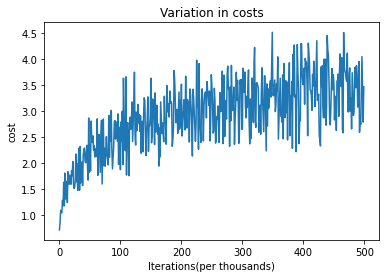

train accuracy: 100.0 %
test accuracy: 100.0 %


In [15]:
#Testing the above model on blobs dataset
d = model(X_train_blobs, Y_train_blobs, X_test_blobs,Y_test_blobs,
          num_iterations = 500, learning_rate = 0.005)

Since the blobs dataset if a linearly seperable one, we can observe 100 % accuarcy by which we can infer that our algorithm does a really good job classifying the two different classes here.

##### Testing on Moons dataset

Cost after 0 epoch: 0.706319
Cost after 100 epoch: 2.259306
Cost after 200 epoch: 2.631947
Cost after 300 epoch: 1.076536
Cost after 400 epoch: 1.235921


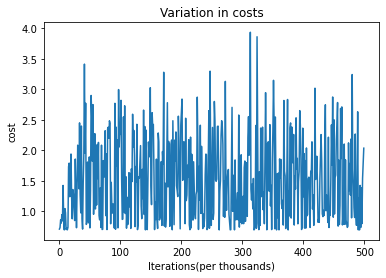

train accuracy: 86.84210526315789 %
test accuracy: 88.80597014925374 %


In [16]:
#Testing the above model on moons dataset
d = model(X_train_moons, Y_train_moons, X_test_moons,Y_test_moons,
          num_iterations =500 , learning_rate = 0.005)

Since the dataset is not linearly seperable as seen above in the plot, there are few examples that our algorithm is misclassifying. But however, since the test accuracy is 88% , we can say it does a really good job distinguishing most of the examples.

### PART-3 & PART-4
### Implement Shallow Neural network & Challenging task ( test on cifar dataset )


##### Obtaining,Preparing and Pre-processing the dataset

In [27]:
# This function is taken from the CIFAR website
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [28]:
# Load the batch
batch1 = loadbatch('data_batch_1')
print("Batch length", len(batch1))

# Looking at all the keys, so that we can choose the required ones
print('All keys in the batch:', batch1.keys())

# Extract Labels
labels = batch1[b'labels']
print(loadlabelnames())

Batch length 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [29]:
batch1 = loadbatch('data_batch_1')
batch1_data= batch1[b'data']    
batch1_labels = batch1[ b'labels']

red_channel = batch1_data[:,:1024]
    
labels = np.array([batch1_labels])
labels = labels.T

data = np.append(red_channel,labels,axis=1)
automobile= data[data[:,-1] == 1]
truck = data[data[:,-1] == 9]
y = np.concatenate((automobile,truck),axis=0)

Y = y[:,[-1]]
Y[Y==9] = 0

X = np.delete(y,-1,1)

In [30]:
X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar = train_test_split(X, Y, 
                                               test_size=0.3, random_state=17)

# Transpose the data to make it in input format
X_train_cifar = np.transpose(X_train_cifar)
X_test_cifar = np.transpose(X_test_cifar)
Y_train_cifar = np.transpose(Y_train_cifar)
Y_test_cifar = np.transpose(Y_test_cifar)

# Normalising the data 
X_train_cifar = X_train_cifar/255
X_test_cifar = X_test_cifar/255

print(X_train_cifar.shape)
print(Y_train_cifar.shape)
print(X_test_cifar.shape)
print(Y_test_cifar.shape)

(1024, 1368)
(1, 1368)
(1024, 587)
(1, 587)


### A Shallow Neural Network with One Hidden Layer 

Here I'm just going to extend the previous implementation by adding multiple neurons and one more hidden layer to make it a shallow Neural network. All the equations governing the different steps are mentioned below


#### Forward Propagation:

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = sigmoid(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = sigmoid(Z^{[2]})$$

$$ {L}(A^{[2]}, Y) =  - Y  \log(A^{[2]}) - (1-Y)  \log(1-A^{[2]})$$


$$ J = \frac{1}{m} {L}(A^{[2]}, Y)$$


#### Backward Propagation:

We will then use Gradient Descent optimisation algorithm to search for weights w and b that minimise the cost for a given training set. The below equations(which are obtained by performing partial derivatives on the previous forward propagation equations) can be used to update w and b after every epoch.

$$ dZ^{[2]} = A^{[2]} -Y$$ 
$$ dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]}T$$ 
$$ db^{[2]} = \frac{1}{m} np.sum( dZ^{[2]}, axis=1, keepdims=true)$$\

$$ dZ^{[1]} = W^{[2]}.T dZ^{[2]} * derivate(sigmoid(Z^{[1]}))$$ 
$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} X.T$$ 
$$ db^{[1]} = \frac{1}{m} np.sum( dZ^{[1]}, axis=1, keepdims=true)$$

#### Optimization

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.
So, for our algorithm here the parameters to update would be:

$$ W^{[1]} = \theta - \alpha \text{ } dW^{[1]}$$
$$ b1 = \theta - \alpha \text{ } db^{[1]}$$
$$ W^{[2]} = \theta - \alpha \text{ } dW^{[2]}$$
$$ b2 = \theta - \alpha \text{ } db^{[2]}$$

 

#### Initialization

In [31]:
def initialize_parameters_NN(n_x, n_h, n_y):
    # Function to randomly initialise 
    #the weights for the neural network
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [32]:
def forward_propagation_NN(X, parameters): 
    # Getting the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    m = X.shape[1]
    
    # Calculate Z1
    Z1 = np.dot(W1, X) + b1
    # Calculate Activation 1 with sigmoid  
    # as the activation function
    A1 = sigmoid(Z1)
    # Calculate Z2
    Z2 = np.dot(W2, A1) + b2
    # Calculate Z2 with Sigmoid as this is the output layer
    A2 = sigmoid(Z2)
    
    #dictionary of values required for back-propagation
    forward_prop = {"A1": A1,"A2": A2}
    
    return forward_prop

In [33]:
def back_propagation_NN(parameters, forward_prop, X, Y):
   
    # Get the shape of the data
    m = X.shape[1]
    
    # Get W1, W2, A1, A2 from params and forwards
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = forward_prop['A1']
    A2 = forward_prop['A2']
    
    # Back-propagation 
    dZ2= A2 - Y 
    dW2 = (1 / m) * np.dot(dZ2, np.transpose(A1))
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(np.transpose(W2), dZ2), 
                      1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
    
    return gradients

In [34]:
def optimize_NN(parameters, gradients, learning_rate=0.001):
    
    # Update Parameters with Learning Rate
    
    #from parameters, obtaining W1,b1,W2,b2 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # from gradients, obtaining dW1, dW2, db1,db2 
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    # Calculate Updated Parameters 
    #with Gradient and Learning Rate
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [35]:
def model_1layer(X_train, Y_train, X_test, Y_test,
                 h, epochs=10000, learning_rate = 0.1):
    
    
    m = X_train.shape[1]
    nx = X_train.shape[0] # size of the input layer
    nh = h # Size of the hidden layer
    ny = Y_train.shape[0] # size of the output layer
    
    # Initialize parameters
    parameters = initialize_parameters_NN(nx, h, ny)
    
    # Get W1,b1,W2,b2 from parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    costs = [] # Save Cost at every epoch
    
    # Implement Gradient Descent with epochs

    for i in range(0, epochs):
        
        # Implementing stochastic gradient descent 
        #by Iterating through each training example once for every epoch
        for j in range(0,m): 
            
            #Randomly selecting one example each iteration,
            #we can change the size as required for implementing batch gradient descent
            sel = np.random.choice(X_train.shape[1],size=1,replace=False)
            
            X_train_mini = X_train[:,sel]
            Y_train_mini = Y_train[:,sel]
    
         
            # Forward Propagation
            forward_prop = forward_propagation_NN(X_train_mini, parameters)
            A2 = forward_prop['A2']
 
            # Backpropagation to calculate the Gradients
            gradients = back_propagation_NN(parameters, forward_prop, 
                                            X_train_mini, Y_train_mini)
 
            # Update the parameters
            parameters = optimize_NN(parameters, gradients, learning_rate)
        
        
        # Compute Cost
        cost = compute_cost(A2, Y_train)
        costs.append(cost)
        # Print the cost every 1000 iterations
        if i % 100 == 0:
            print ("Cost after %i epoch: %f" % (i, cost))
        
        costs.append(cost)
       
     # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations(per thousands)')
    plt.title("Variation in costs")
    plt.show()
    
     #  Predict test/train set examples
    predictions_test = predict_NN( X_test,parameters)
    predictions_train = predict_NN( X_train,parameters)

     # Print train/test Errors
    print("train accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
    print("test accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_test - Y_test)) * 100))
    
    
    return parameters

In [36]:
def predict_NN(X,parameters):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    forward_prop = forward_propagation_NN(X, parameters)
    A2 = forward_prop['A2']
    
    for i in range(A2.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A2[0, i] > 0.5 else 0
      
    return Y_prediction

##### Testing on Moons dataset

Cost after 0 epoch: 0.692744
Cost after 100 epoch: 1.508591
Cost after 200 epoch: 2.057930
Cost after 300 epoch: 1.976849
Cost after 400 epoch: 1.379935


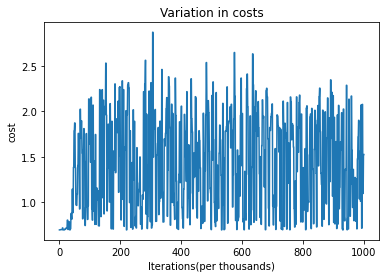

train accuracy: 88.34586466165413 %
test accuracy: 88.80597014925374 %


In [38]:
parameters = model_1layer(X_train_moons, Y_train_moons,X_test_moons,
                          Y_test_moons, h = 50, epochs=500, learning_rate = 0.005)

For the moons dataset, we can observe the training accuracy and the test accuracy are identical to the previous logistic regression implementation. So we can infer that the Shallow neural network, doesn't do any better job than the logistic unit alone for this dataset. But training the model for more epochs and tuning any hyperparameters might increase the performance.

##### Testing on blobs dataset

Cost after 0 epoch: 0.693906
Cost after 100 epoch: 2.521035
Cost after 200 epoch: 3.469258
Cost after 300 epoch: 3.962709
Cost after 400 epoch: 3.076896


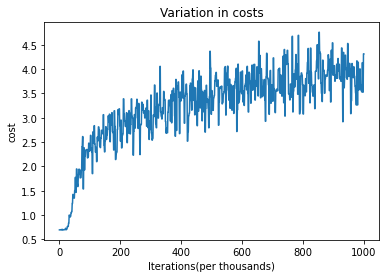

train accuracy: 100.0 %
test accuracy: 100.0 %


In [39]:
parameters = model_1layer(X_train_blobs, Y_train_blobs, X_test_blobs,
                          Y_test_blobs, h = 50, epochs=500, learning_rate = 0.005)

Since the blobs dataset is linearly seperable, the examples are classified perfectly here as well. 

##### Testing on the CIFAR dataset

Cost after 0 epoch: 0.694999
Cost after 100 epoch: 0.734666


C:\Users\javva\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Cost after 200 epoch: 0.836794
Cost after 300 epoch: 0.820014
Cost after 400 epoch: 0.840241


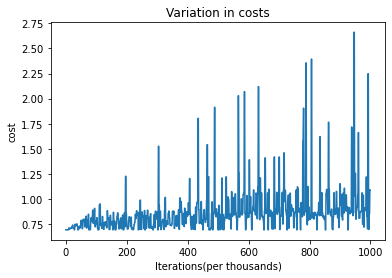

train accuracy: 76.90058479532163 %
test accuracy: 64.7359454855196 %


In [40]:
parameters = model_1layer(X_train_cifar, Y_train_cifar,X_test_cifar,
                          Y_test_cifar, h = 10, epochs=500, learning_rate = 0.005)

The learning curve doesn't give much information on the learning of the model here, because we have implemented stochastic Gradient descent. However since we are using only one batch of data and one colour channel for our algorithm, we can observe an accuracy of 65 % performance which pretty decent for a Deep learning algorithm trained on such less data, as most of the deep learning problems are data hungry tasks.

### PART-5

#### Enhancements

- I have added an additional hidden layer to the network to make the model as deep neural network.

- I have normalised the initialization of weights with respect to the previous layer's weights.

- I have also added L2 regularisation to the network, to prevent over-fitting.

- I have used batch gradient descent instead of stochastic/mini-batch gradient descent here, to reduce the execution time. Because these variations are mostly effective only when we have distributed computing setup, where each mini-batch can be run in parallel in multiple machines. Since in our case, we are executing the algorithm on a single machine, these variations aren't of much use and they drastically increase the execution time, so I used batch gradient descent as an enhancement.

- I have also implemented ReLU activation function for the two hidden layers as it is the most commonly used activation function in most of the state-of-the-art deep learning approaches, which didn't help much for this problem(the code is commented ) . So I reverted back to using sigmoid for all the layers again.

In [45]:
# # relu implementation
# def relu(x):
#     s = np.maximum(0,x)
#     return s

# Dynamically Initialise the parameters
def initialize_parameters_3layer(layers):

    parameters = {}
    L = len(layers) 
    
    for i in range(L-1):
        # Update weight with weight Normalization
        parameters["W" + str(i+1)] = np.random.randn(layers[i+1], layers[i]) / np.sqrt(layers[i])
        parameters["b" + str(i+1)] = np.zeros((layers[i+1], 1));

    return parameters


def forward_propagation_3layer(X, parameters):

    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # layer 1
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    # Layer 2
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # Layer 3
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Required For Back Propagation
    forward_prop = (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3)

    return forward_prop

def compute_cost_with_regularization(A3, Y, forward_prop, lambd=0.1):
    
    
    m = Y.shape[1]
    
    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
    
    # This gives you the cross-entropy part of the cost
    cross_entropy_cost = compute_cost(A3, Y) 
    
    #L2-component
    L2_regularization_cost =lambd * (np.sum(np.square(W1))
                                     + np.sum(np.square(W2)) 
                                     + np.sum(np.square(W3))) / (2 * m)
    
    #Cost after L2-regularisation
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

def back_propagation_3layer(X, Y, forward_prop,lambd = 0.1):

    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop

    m = X.shape[1]
    
    
    # Layer 3
    dZ3 = (A3 - Y) 
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd * W3) / m
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    # Layer 2
    dA2 = np.dot(W3.T, dZ3)
    # derivative of the relu activation function
    #dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dZ2 =  np.multiply(np.dot(np.transpose(W3), dZ3), 
                       1 - np.power(A2, 2))
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd * W2) / m
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    # Layer 1
    dA1 = np.dot(W2.T, dZ2)
    # derivative of the relu activation function
    #dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dZ1 =  np.multiply(np.dot(np.transpose(W2), dZ2),
                       1 - np.power(A1, 2))
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd * W1) / m
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    

    gradients = {"dW3": dW3, "db3": db3,
                 "dW2": dW2, "db2": db2,
                 "dW1": dW1, "db1": db1}

    return gradients

# Updating the parameters dynamically
def optimize_3layer(parameters, gradients, learning_rate):

    # Number of layers
    L = len(parameters) // 2 

    # Update the Parameters
    for i in range(L):
        parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - learning_rate * gradients["dW" + str(i+1)]
        parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - learning_rate * gradients["db" + str(i+1)]

    return parameters

In [49]:
def model_3layer(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
                 epochs = 20000, h1=10, h2=5,lambd = 0.1):
   
    gradientss = {}
    costs = [] # to keep track of the loss

    layers = [X_train.shape[0], h1, h2, 1]

    # Initialize parameters dictionary.
    parameters = initialize_parameters_3layer(layers)

    # Loop (gradient descent)

    for i in range(epochs):

        # Forward propagation
        forward_prop = forward_propagation_3layer(X_train, parameters)
        
        (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
        
        # Loss
        cost = compute_cost_with_regularization(A3, Y_train, forward_prop, lambd)

        # Backward propagation.
        gradients = back_propagation_3layer(X_train, Y_train, forward_prop, lambd)

        # Update parameters
        parameters = optimize_3layer(parameters, gradients, learning_rate)

        # Print loss every 1000 epochs
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    #  Predict test/train set examples
    predictions_test = predict_NN_3layer(parameters,X_test)
    predictions_train = predict_NN_3layer(parameters,X_train)

     # Print train/test Errors
    print("train accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
    print("test accuracy: {} %"
          .format(100 - np.mean(np.abs(predictions_test - Y_test)) * 100))

    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations(per thousands)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [50]:
def predict_NN_3layer(parameters, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    forward_prop = forward_propagation_3layer(X, parameters)
    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
    
    for i in range(A3.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
      
    return Y_prediction

##### Testing the algorithm for the CIFAR dataset

Cost after iteration 0: 0.6980781007480913
Cost after iteration 100: 0.6677683337248862
Cost after iteration 200: 0.6580358126970915
Cost after iteration 300: 0.6507867347548345
Cost after iteration 400: 0.6444471346966144
Cost after iteration 500: 0.6387946355876356
Cost after iteration 600: 0.6333865263527328
Cost after iteration 700: 0.6280104074285702
Cost after iteration 800: 0.622655343399562
Cost after iteration 900: 0.6173676061018525
Cost after iteration 1000: 0.6122027498053962
Cost after iteration 1100: 0.6072661751780051
Cost after iteration 1200: 0.6027898322283863
Cost after iteration 1300: 0.5990403637655007
Cost after iteration 1400: 0.5962798959957075
Cost after iteration 1500: 0.5946698263977999
Cost after iteration 1600: 0.5943194878975502
Cost after iteration 1700: 0.595110420712149
Cost after iteration 1800: 0.5967543177638048
Cost after iteration 1900: 0.5990767207895398
train accuracy: 68.49415204678363 %
test accuracy: 65.07666098807496 %


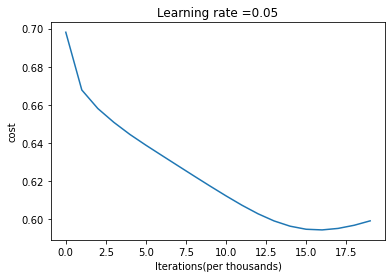

In [55]:
parameters_3l = model_3layer(X_train_cifar, Y_train_cifar,X_test_cifar,Y_test_cifar,
                    learning_rate = 0.05, epochs = 2000, h1=124,h2=64, lambd=0.01)

We can observe a slight increase in the test accuracy of the model on the cifar dataset due to the enhancements done above. However having more hidden layers , increasing the epochs and tuning the different hyperparameters might increase the performance of the model. Also due to the implementation of batch gradient descent,I observed that the algorithm runs much faster than the previous implementation and looking at the learning curve, we can clearly observe the parameters being learned every epoch.

##### Testing the algorithm for the Moons dataset

Cost after iteration 0: 0.7659770192379947
Cost after iteration 100: 0.6409809055441171
Cost after iteration 200: 0.5501902568978584
Cost after iteration 300: 0.4823876374557625
Cost after iteration 400: 0.4366329823341719
Cost after iteration 500: 0.40719999345059293
Cost after iteration 600: 0.38812505787985446
Cost after iteration 700: 0.37534124383157547
Cost after iteration 800: 0.36642724876231375
Cost after iteration 900: 0.35998504354102334
Cost after iteration 1000: 0.3551956756710563
Cost after iteration 1100: 0.3515612839902142
Cost after iteration 1200: 0.3487641747041523
Cost after iteration 1300: 0.3465909803583054
Cost after iteration 1400: 0.34489157564016754
Cost after iteration 1500: 0.34355632111251616
Cost after iteration 1600: 0.3425029723625695
Cost after iteration 1700: 0.3416687431009674
Cost after iteration 1800: 0.3410051884019232
Cost after iteration 1900: 0.34047470149763354
train accuracy: 86.46616541353383 %
test accuracy: 88.05970149253731 %


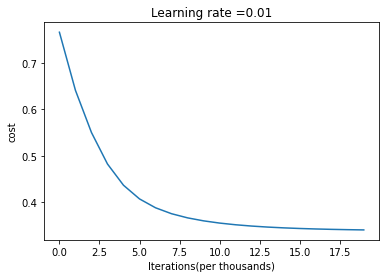

In [66]:
parameters_3l = model_3layer(X_train_moons, Y_train_moons, X_test_moons, Y_test_moons,
                learning_rate = 0.01, epochs = 2000, h1=124,h2=64, lambd=0.1)

For the moons dataset , we can observe the parameters being learned every epoch, however the accuracy/performance of the model is the same. So we can infer from this that we should stick to simple algorithms to simple problems, as a multi-layer neural network is a over-kill for this dataset

##### Testing the algorithm on the blobs dataset

Cost after iteration 0: 0.7632784930753876
Cost after iteration 100: 0.7230216921549002
Cost after iteration 200: 0.7032562921042311
Cost after iteration 300: 0.6911140687752041
Cost after iteration 400: 0.6815977284354431
Cost after iteration 500: 0.6727011569983682
Cost after iteration 600: 0.6634907590756216
Cost after iteration 700: 0.6534017307427837
Cost after iteration 800: 0.6419863481815626
Cost after iteration 900: 0.6288288030841995
train accuracy: 100.0 %
test accuracy: 100.0 %


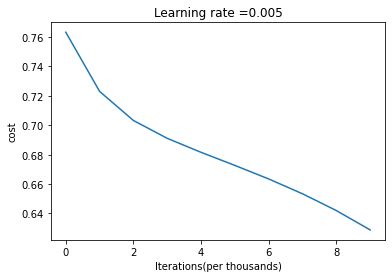

In [68]:
parameters_3l = model_3layer(X_train_blobs, Y_train_blobs, X_test_blobs, Y_test_blobs,
                learning_rate = 0.005, epochs = 1000, h1=10,h2=10, lambd=0.01)

There's not much interesting happening for the blobs dataset, as expected the algorithm is classifying all the examples perfectly, but a 3-layer neural network is certainly a over-kill for this dataset.

### Bibliography:
- Neural networks and Deep Learning Course by Professor Andrew NG on [Coursera](https://www.coursera.org/account/accomplishments/certificate/526286M6HZEV)
- CT5133-Deep Learning Lectures
- [Deep Learning Book by Goodfellow, Bengio & Courville](http://www.deeplearningbook.org/)
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://cs230.stanford.edu/files/C1M3.pdf
- http://cs230.stanford.edu/files/C1M4.pdf
- https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
- https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/